In [10]:
# =========================================================================================
# ========================== Question 2.3: Band reject filter =============================
# =========================================================================================
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

In [11]:
# reading and converting color image from RGB to grasyscale image
img = rgb2gray(io.imread(r'C:\Users\Sibusiso Mgidi\Desktop\Digital Image Processing\Assignment 1\imgs\zoneplate.tif'))

In [12]:
# Creating a low pass filter mask
P, Q = img.shape

# Setting up the range of variables
u = np.arange(P)
v = np.arange(Q)

# Computing indices to use in meshgrid
idx_x = np.where( u > P / 2 )
ind_y = np.where( v > Q / 2 )
u[idx_x] = u[idx_x] - P
v[idx_x] = v[idx_x] - Q

# Create a mask grid out of an image of u and v frequency.
V,U = np.meshgrid(v,u)

# Compute the distance from the center of the frequency rectangle.
D = np.sqrt(V**2+U**2)

In [13]:
# Compute the DFT, F(u,v) of the frequency rectangle
dft = np.fft.fft2(img)
img_shift = np.real(np.fft.fftshift(dft))

# Initialize order value
n = 3

# Computing cutoff frequency: D0 (center frequency of the reject band)
D0 = 0.05 * Q

# Initialize band width: (W)
W = 15

# Design the butterworth band reject filter HBBR(u,v)
HBBr = 1 / (1 + ((D * W)/(D**2 - D0**2))**(2*n))

# Compute G(u,v) from butterworth filter, H(u,v) and DTF, F(u,v) : G(u,v) = H(u,v) * F(u,v)  
G = HBBr * dft

# Compute the DFT inverse DFT in order to generate filtered image
filtered_img = np.real(np.fft.ifft2(G))

# Obtaining the absolute value of all each element 
tranformed_img = np.abs(filtered_img)

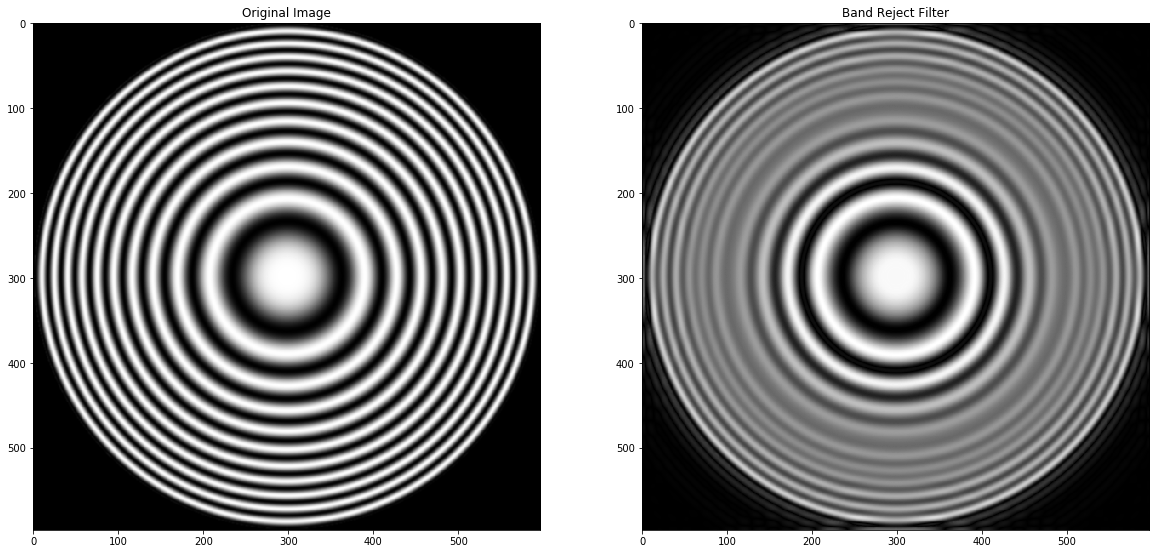

In [14]:
# Plot the original image in comparison to the transformed image
fig = plt.figure(figsize=(20,20))

# Show original image
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Original Image")
plt.imshow(img, cmap='gray')

# Show transformed image
ax2 = fig.add_subplot(1,2,2) 
ax2.set_title("Band Reject Filter")
plt.imshow(tranformed_img, cmap='gray')

In [15]:
# Saving the tranformed image on a local machine
io.imsave(r'C:\Users\Sibusiso Mgidi\Desktop\Digital Image Processing\Assignment 1\imgs\2_3_zoneplate_tranformed.png', np.uint8(tranformed_img))